In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt

In [123]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

# just set the seed for the random number generator
#np.random.seed(107)

In [124]:
# Change...
pair = 'BTCUSDT'

# interval used to compute indicators and backtest analysis
# valid strategy intervals - 1min, 3min, 5min, 15min, 30min, 1H, 2H, 4H, 6H, 8H, 12H, 1D, 3D, 1W, 1M
strategy_interval = '1H'

# date to start/end analysis
# Use '' for not to limit the data
dt_start_analysis = '2021-10-1'
dt_end_analysis = ''


In [125]:
from binance_utils import init
from trade_utils import get_data

client = init()
data = get_data(client, pair, strategy_interval)

In [126]:
data.shape

(36248, 5)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36248 entries, 2017-08-17 04:00:00 to 2021-10-10 20:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   36248 non-null  float64
 1   HighPrice   36248 non-null  float64
 2   LowPrice    36248 non-null  float64
 3   ClosePrice  36248 non-null  float64
 4   Volume      36248 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [128]:
data.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807


In [129]:
data.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2021-10-10 16:00:00,55370.28,55482.90,55158.39,55471.07,2902.668250
2021-10-10 17:00:00,55471.07,55485.00,55000.00,55339.28,3452.280210
2021-10-10 18:00:00,55339.28,55393.56,55012.00,55312.65,2626.360460
2021-10-10 19:00:00,55312.65,55523.36,55213.28,55450.25,2817.113290
2021-10-10 20:00:00,55450.25,56561.31,55209.94,55429.80,8277.379648


In [130]:
data.sample(10)

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
OpenTime,,,,,
2021-03-26 04:00:00,52407.19,52774.71,52172.34,52693.13,1990.736097
2017-11-20 02:00:00,8030.00,8049.46,7992.00,8000.00,179.856181
2020-01-01 15:00:00,7221.60,7255.00,7218.29,7234.19,1393.888792
2019-03-23 12:00:00,4002.00,4006.23,3986.37,3990.62,994.104178
2020-03-18 23:00:00,5341.12,5409.00,5321.27,5393.04,3644.921496
2018-01-19 10:00:00,11301.34,11590.00,11247.71,11570.00,1394.057650
2020-02-26 20:00:00,8831.14,8864.00,8775.00,8804.35,2238.098339
2020-08-23 00:00:00,11663.51,11688.81,11606.72,11645.21,2018.427323
2018-08-25 03:00:00,6757.02,6777.70,6707.75,6717.38,1169.229178


In [131]:
from technical_indicator_utils import sma, ema, macd, rsi, adx, bbands

# Calculate returns
data['Returns'] = data['ClosePrice'].pct_change() * 100 # pct_change() = percent change from previous price
data['Returns2'] = data['ClosePrice'].pct_change(2) * 100 # change from 2 previous price
data['Returns5'] = data['ClosePrice'].pct_change(5) * 100 # change from 5 previous price

# Volatility
data['volatility'] = data.rolling(24, min_periods = 24)['Returns'].std() * 100

# SMA
data['SMA5'] = sma(data['ClosePrice'], 5)
data['SMA10'] = sma(data['ClosePrice'], 10)
data['SMA20'] = sma(data['ClosePrice'], 20)
data['SMA30'] = sma(data['ClosePrice'], 30)
data['SMA50'] = sma(data['ClosePrice'], 50)
data['SMA100'] = sma(data['ClosePrice'], 100)
data['SMA200'] = sma(data['ClosePrice'], 200)

# EMA
data['EMA5'] = ema(data['ClosePrice'], 5)
data['EMA10'] = ema(data['ClosePrice'], 10)
data['EMA20'] = ema(data['ClosePrice'], 20)
data['EMA30'] = ema(data['ClosePrice'], 30)
data['EMA50'] = ema(data['ClosePrice'], 50)
data['EMA100'] = ema(data['ClosePrice'], 100)
data['EMA200'] = ema(data['ClosePrice'], 200)

# MACD
data['MACD'], data['MACDSignal'], data['MACDHist'] = macd(data['ClosePrice'])

# RSI
data['RSI'] = rsi(data.ClosePrice)

# ADX
data['DI+'], data['DI-'], data['ADX'] = adx(data['HighPrice'], data['LowPrice'], data['ClosePrice'])

# Bollinger Bands
data['UpperBBand'], data['MidiBBand'], data['LowerBBand'] = bbands(data['ClosePrice'])

In [132]:
#limit data to plot
if dt_end_analysis == '' and dt_start_analysis != '':
    data = data[dt_start_analysis:]
elif dt_end_analysis != '' and dt_start_analysis == '':
    data = data[:dt_end_analysis]
elif dt_end_analysis != '' and dt_start_analysis != '':
    data = data[dt_start_analysis:dt_end_analysis]

In [133]:
from technical_indicator_utils import fibonacci_retracement_levels

# Fibonacci retracement
fib_levels = fibonacci_retracement_levels(data['ClosePrice'].max(), data['ClosePrice'].min())

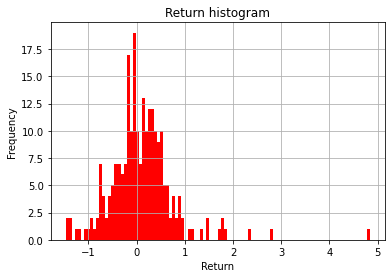

In [134]:
# Plot the histogram
data['Returns'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.title('Return histogram')
plt.show()

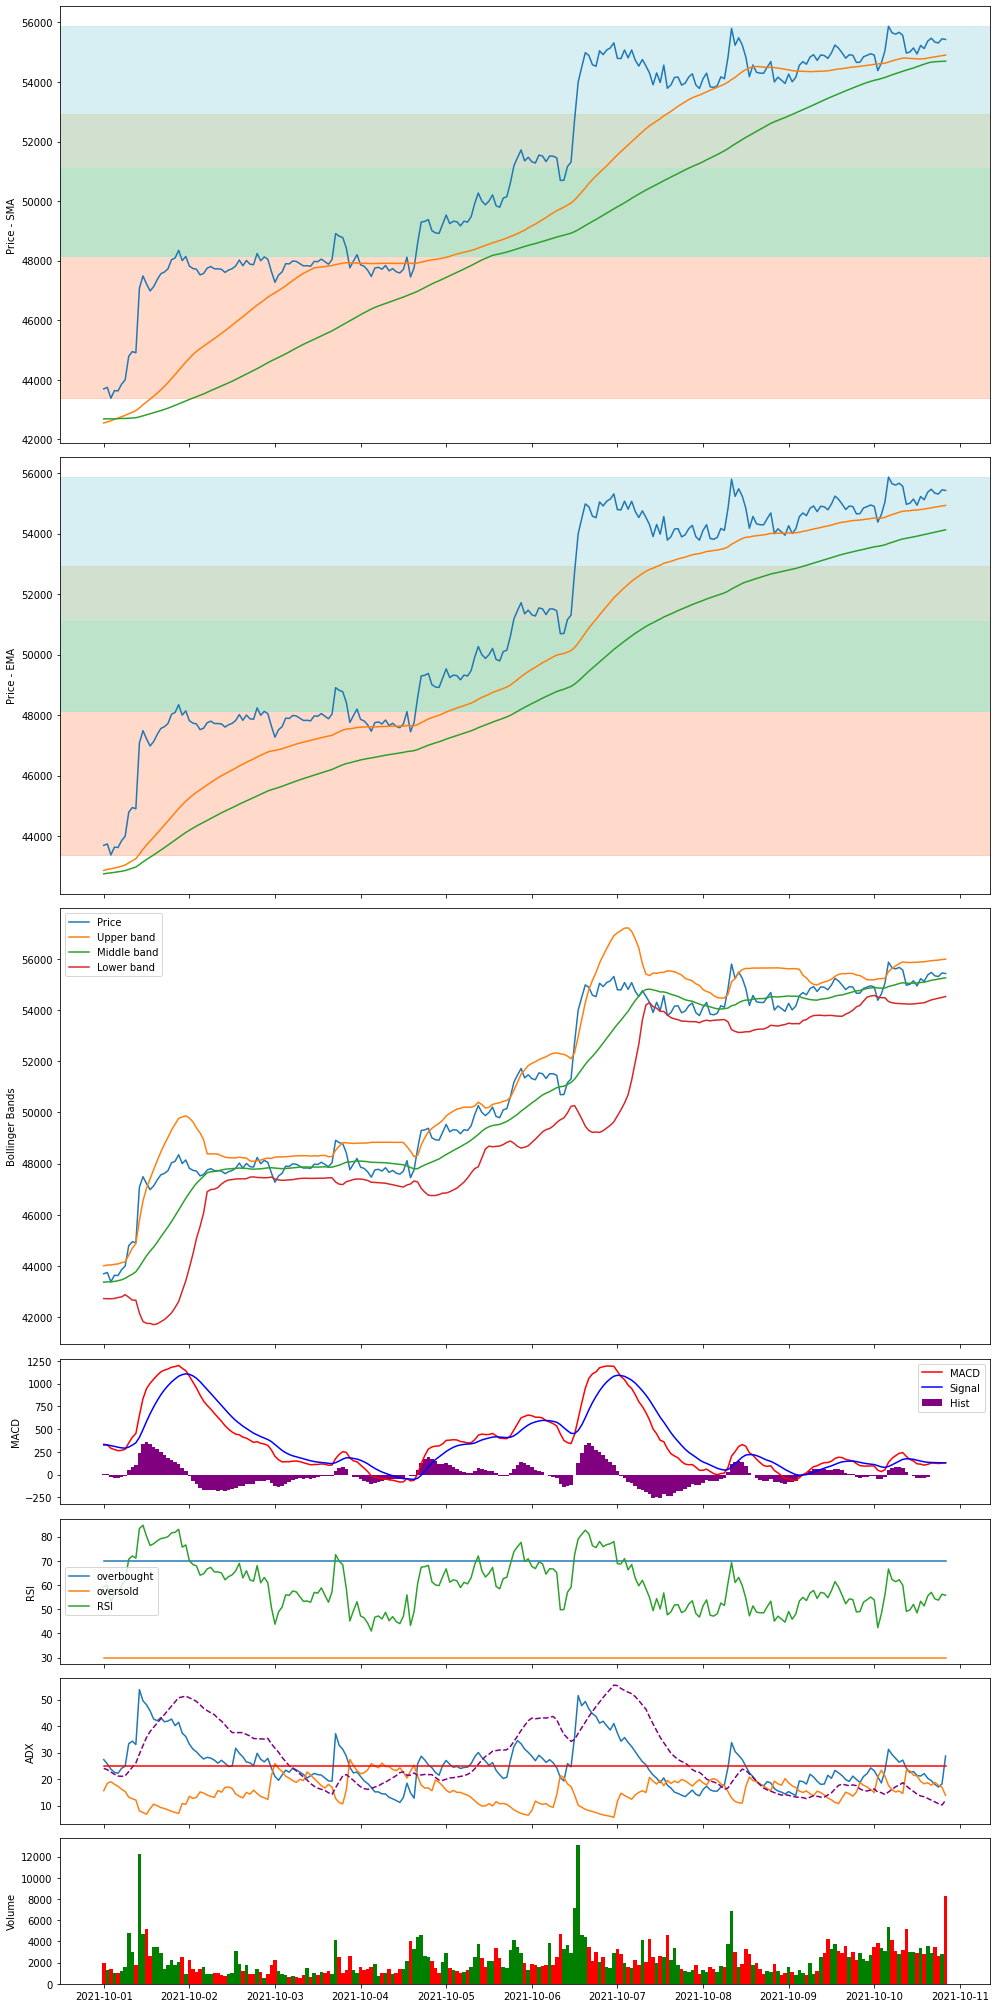

In [135]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=7, sharex=True, figsize=(14, 28), gridspec_kw = {'height_ratios':[3, 3, 3, 1, 1, 1, 1]})

# Price x SMA
ax1.plot(data.index, data[['ClosePrice', 'SMA50', 'SMA100']])
# Fibonacci retracement
ax1.axhspan(fib_levels['level1'], fib_levels['price_min'], alpha=0.4, color='lightsalmon')
ax1.axhspan(fib_levels['level2'], fib_levels['level1'], alpha=0.5, color='palegoldenrod')
ax1.axhspan(fib_levels['level3'], fib_levels['level2'], alpha=0.5, color='palegreen')
ax1.axhspan(fib_levels['price_max'], fib_levels['level3'], alpha=0.5, color='powderblue')
ax1.set_ylabel('Price - SMA')

# Price x EMA
ax2.plot(data.index, data[['ClosePrice', 'EMA50', 'EMA100']])
# Fibonacci retracement
ax2.axhspan(fib_levels['level1'], fib_levels['price_min'], alpha=0.4, color='lightsalmon')
ax2.axhspan(fib_levels['level2'], fib_levels['level1'], alpha=0.5, color='palegoldenrod')
ax2.axhspan(fib_levels['level3'], fib_levels['level2'], alpha=0.5, color='palegreen')
ax2.axhspan(fib_levels['price_max'], fib_levels['level3'], alpha=0.5, color='powderblue')
ax2.set_ylabel('Price - EMA')

# Bollinger Bands
ax3.plot(data['ClosePrice'], label='Price')
ax3.plot(data['UpperBBand'], label='Upper band')
ax3.plot(data['MidiBBand'], label='Middle band')
ax3.plot(data['LowerBBand'], label='Lower band')
ax3.legend()
ax3.set_ylabel('Bollinger Bands')

# MACD
ax4.plot(data.index, data['MACD'], label='MACD', color = 'red')
ax4.bar(data.index, data['MACDHist'], label='Hist', color="purple", width = timedelta(hours=1))
ax4.plot(data.index, data['MACDSignal'], label='Signal', color='blue')
ax4.legend()
ax4.set_ylabel('MACD')

# RSI
ax5.plot(data.index, [70] * len(data.index), label='overbought')
ax5.plot(data.index, [30] * len(data.index), label='oversold')
ax5.plot(data.index, data['RSI'], label='RSI')
ax5.legend()
ax5.set_ylabel('RSI')

# ADX
ax6.plot(data.index, data[['DI+', 'DI-']])
ax6.plot(data.index, data[['ADX']], color='purple', linestyle='dashed')
ax6.plot(data.index, [25] * len(data.index), color = 'red')
ax6.set_ylabel('ADX')

# Volume
# make bar plots and color differently depending on up/down for the day
pos = data['OpenPrice'] - data['ClosePrice'] < 0
neg = data['OpenPrice'] - data['ClosePrice'] > 0
ax7.bar(data.index[pos], data[pos]['Volume'], color='green', width = timedelta(hours=1))
ax7.bar(data.index[neg], data[neg]['Volume'], color='red', width = timedelta(hours=1))

#ax7.bar(data.index, data['Volume'] / 1000000, width = timedelta(hours=4))
ax7.set_ylabel('Volume')

fig.tight_layout()

## Backtest Strategy

In [136]:
import bt

# Get the price data
price_data = data[['ClosePrice']].copy()

In [137]:
from strategy_utils import get_cross_signal
from backtest_utils import signal_strategy

signal = get_cross_signal(data[['SMA50']].copy(), data[['SMA200']].copy())
bt_sma_cross = signal_strategy(price_data.copy(), signal, 'sma_cross')

In [138]:
from strategy_utils import get_cross_signal
from backtest_utils import signal_strategy

signal = get_cross_signal(data[['EMA50']].copy(), data[['EMA200']].copy())
bt_ema_cross = signal_strategy(price_data.copy(), signal, 'ema_cross')

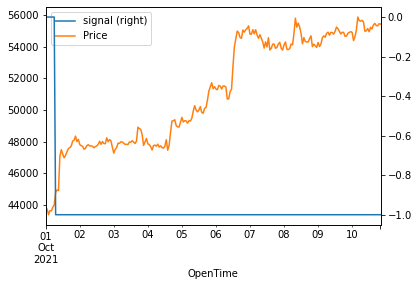

In [139]:
from strategy_utils import get_rsi_signal
from backtest_utils import signal_strategy

#signal = get_rsi_signal(data[['RSI']].copy())
signal = get_rsi_signal(data[['RSI']].copy(), overbought_value=70, oversold_value=30)

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

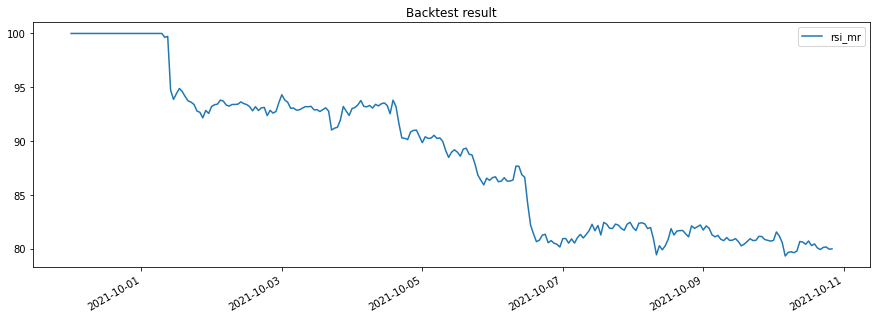

In [140]:
bt_rsi = signal_strategy(price_data.copy(), signal, 'rsi_mr')

bt_result = bt.run(bt_rsi)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

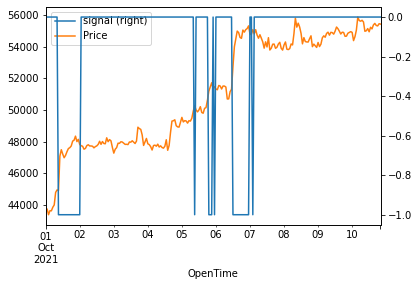

In [141]:
from strategy_utils import get_rsi_adx_signal
from backtest_utils import signal_strategy

signal = get_rsi_adx_signal(data[['RSI']].copy(), data[['ADX']].copy(), data[['DI+']].copy(), data[['DI-']].copy(), overbought_value=70.0, oversold_value=30.0)

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

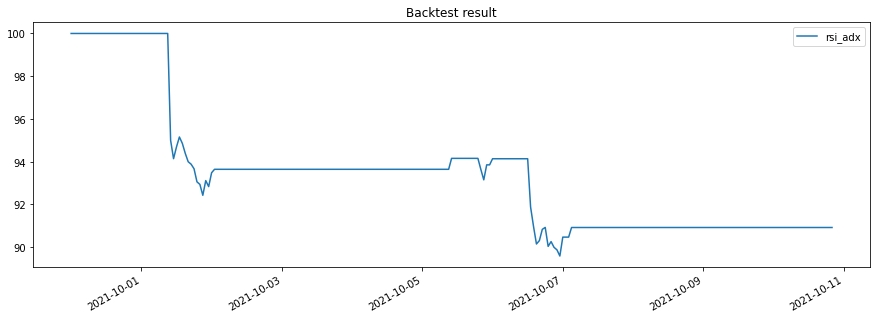

In [142]:
bt_rsi_adx = signal_strategy(price_data.copy(), signal, 'rsi_adx')

bt_result = bt.run(bt_rsi_adx)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

In [143]:
signal['2021-09-21 9:00:00':'2021-09-22 10:00:00']

,value
OpenTime,


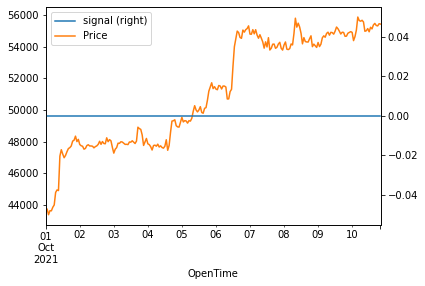

In [144]:
from strategy_utils import get_rsi_plus_signal
from backtest_utils import signal_strategy

signal = get_rsi_plus_signal(data[['RSI']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:1408: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:258: RuntimeWarning: invalid value encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:1408: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in true_divide
  res = np

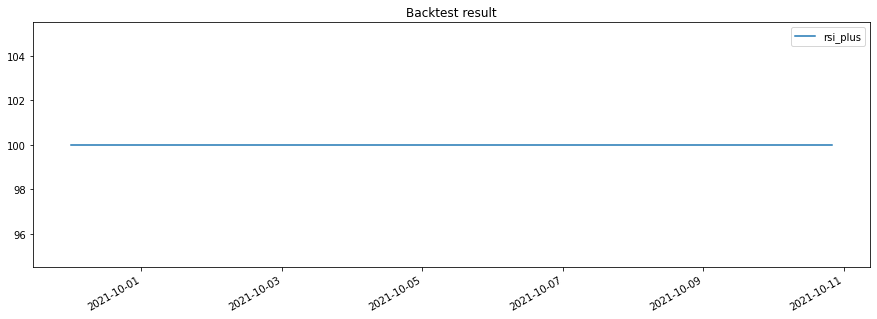

In [145]:
bt_rsi_plus = signal_strategy(price_data.copy(), signal, 'rsi_plus')

bt_result = bt.run(bt_rsi_plus)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

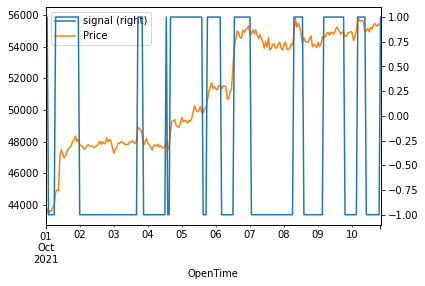

In [146]:
from strategy_utils import get_macd_signal
from backtest_utils import signal_strategy

signal = get_macd_signal(data[['MACDSignal']].copy(), data[['MACD']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

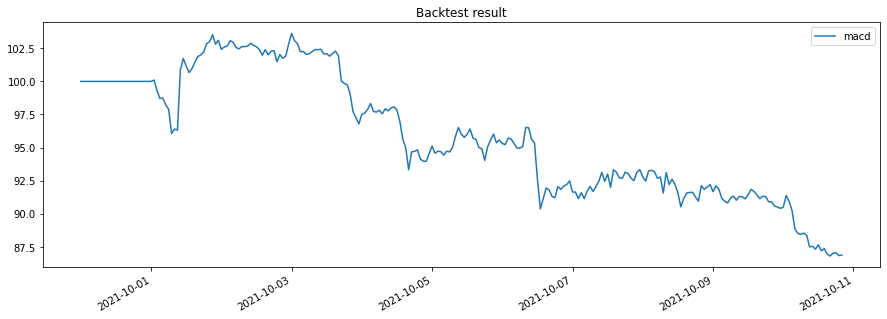

In [147]:
bt_macd = signal_strategy(price_data.copy(), signal, 'macd')

bt_result = bt.run(bt_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

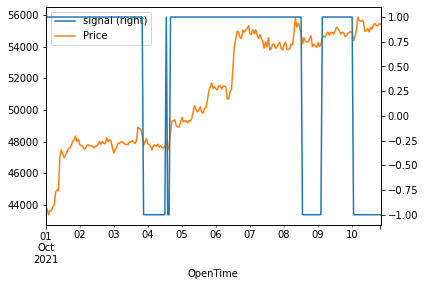

In [148]:
from strategy_utils import get_sma_macd_signal
from backtest_utils import signal_strategy

signal = get_sma_macd_signal(data[['ClosePrice']].copy(), data[['SMA50']].copy(), data[['SMA100']].copy(), data[['MACD']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

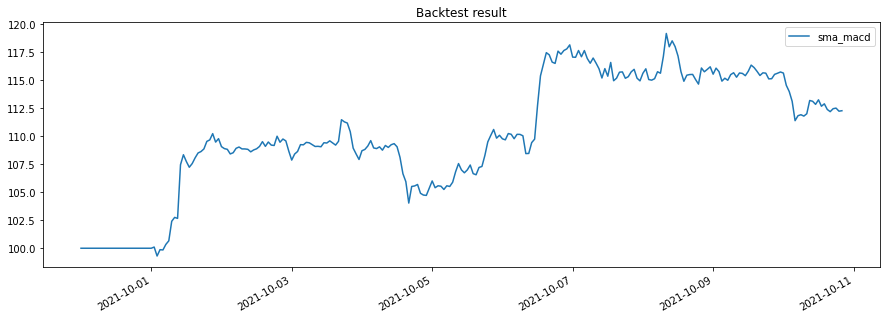

In [149]:
bt_sma_macd = signal_strategy(price_data.copy(), signal, 'sma_macd')

bt_result = bt.run(bt_sma_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

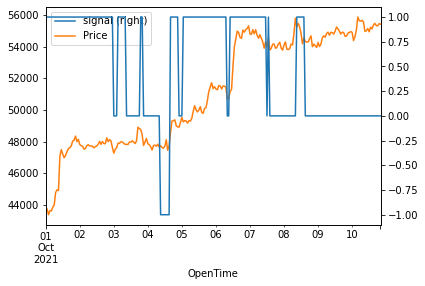

In [150]:
from strategy_utils import get_adx_macd_signal
from backtest_utils import signal_strategy

signal = get_adx_macd_signal(data[['MACD']].copy(), data[['DI+']].copy(), data[['DI-']].copy(), data[['ADX']].copy())

# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

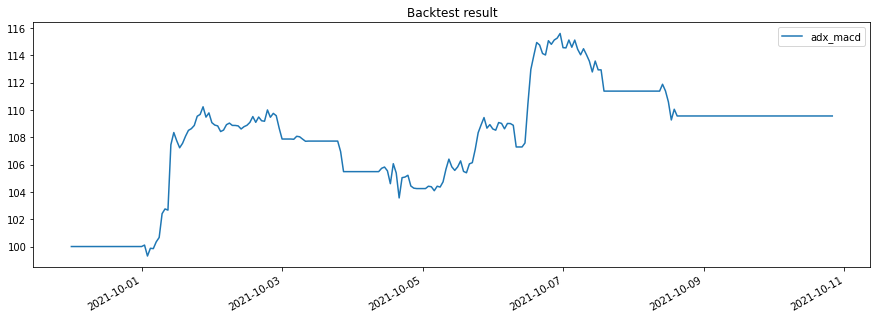

In [151]:
bt_adx_macd = signal_strategy(price_data.copy(), signal, 'adx_macd')

bt_result = bt.run(bt_adx_macd)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

In [152]:
from backtest_utils import signal_above_strategy, buy_and_hold_strategy

# Create signal strategy backtest
bt_sma5 = signal_above_strategy(price_data.copy(), data[['SMA5']].copy(), name='SMA5')
bt_sma10 = signal_above_strategy(price_data.copy(), data[['SMA10']].copy(), name='SMA10')
bt_sma20 = signal_above_strategy(price_data.copy(), data[['SMA20']].copy(), name='SMA20')
bt_sma30 = signal_above_strategy(price_data.copy(), data[['SMA30']].copy(), name='SMA30')
bt_sma50 = signal_above_strategy(price_data.copy(), data[['SMA50']].copy(), name='SMA50')
bt_sma100 = signal_above_strategy(price_data.copy(), data[['SMA100']].copy(), name='SMA100')

# Create benchmark strategy backtest
bt_benchmark = buy_and_hold_strategy(price_data.copy(), name='benchmark')

/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:1408: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in true_divide
  res = np.divide(er.mean(), std)
/home/evandro/Workspace/projects/cryptocurrencies-trade/.venv/lib/python3.8/site-packages/ffn/core.py:258: RuntimeWarning: invalid value encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))


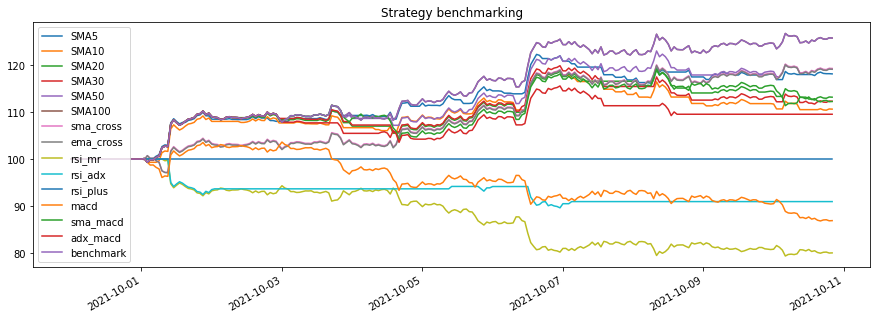

In [153]:
# Run all backtests and plot the resutls
bt_results = bt.run(bt_sma5,bt_sma10, bt_sma20, bt_sma30, bt_sma50, bt_sma100, 
                    bt_sma_cross, bt_ema_cross, bt_rsi, bt_rsi_adx, bt_rsi_plus, bt_macd, bt_sma_macd, bt_adx_macd,
                    bt_benchmark)
# Plot results
bt_results.plot(title='Strategy benchmarking')
plt.show()

In [154]:
bt_results.display()

Stat                 SMA5        SMA10       SMA20       SMA30       SMA50       SMA100      sma_cross    ema_cross    rsi_mr      rsi_adx     rsi_plus    macd        sma_macd    adx_macd    benchmark
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  -----------  -----------  ----------  ----------  ----------  ----------  ----------  ----------  -----------
Start                2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30   2021-09-30   2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30  2021-09-30
End                  2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10   2021-10-10   2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10  2021-10-10
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%        0.00%        0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0

In [155]:
# Obtain all backtest stats
resInfo = bt_results.stats
ordered_strategies = resInfo.loc['total_return'].sort_values(ascending=False)
print(ordered_strategies)

best_strategy = ''
if resInfo.loc['total_return'].sort_values(ascending=False).index[0] == 'benchmark':
    best_strategy = resInfo.loc['total_return'].sort_values(ascending=False).index[1]
else:
    best_strategy = resInfo.loc['total_return'].sort_values(ascending=False).index[0]

bt_best = bt_results.backtests[best_strategy]

SMA100       0.258177
benchmark    0.258177
sma_cross    0.193252
SMA50        0.192323
ema_cross    0.191541
SMA5           0.1817
SMA20        0.131997
SMA30        0.123353
sma_macd     0.122753
SMA10        0.106476
adx_macd     0.095584
rsi_plus          0.0
rsi_adx     -0.090774
macd        -0.131398
rsi_mr      -0.200227
Name: total_return, dtype: object


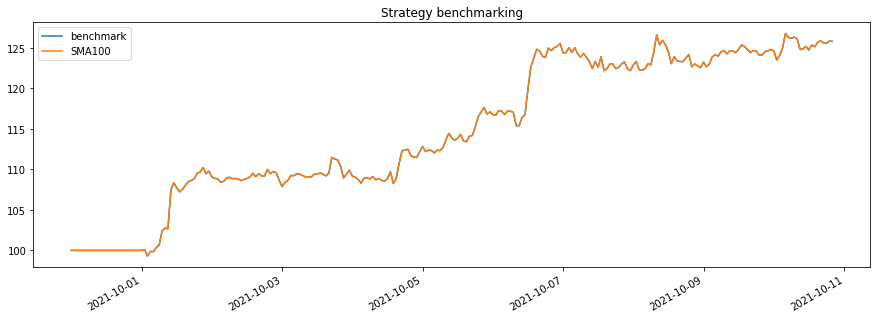

In [156]:
bt_results_best = bt.run(bt_benchmark, bt_best)
bt_results_best.plot(title='Strategy benchmarking')
plt.show()

In [157]:
bt_results_best.get_transactions(strategy_name=best_strategy)

,,price,quantity
Date,Security,,
2021-10-01,value,43694.48,22.0


In [158]:
bt_results.get_transactions(strategy_name='rsi_adx')

,,price,quantity
Date,Security,,
2021-10-01 09:00:00,value,44906.00,-23.0
2021-10-01 10:00:00,value,47081.46,2.0
2021-10-01 11:00:00,value,47488.08,1.0
2021-10-02 01:00:00,value,47736.82,20.0
2021-10-05 09:00:00,value,50269.35,-19.0
2021-10-05 10:00:00,value,49999.99,19.0
2021-10-05 19:00:00,value,51190.11,-19.0
2021-10-05 22:00:00,value,51349.86,19.0
2021-10-05 23:00:00,value,51471.99,-19.0


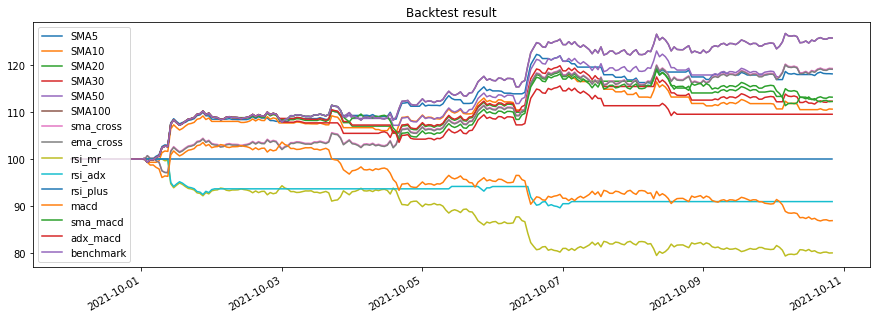

             SMA5      SMA10      SMA20      SMA30       SMA50       SMA100  \
mtd        18.17%     10.65%     13.20%     12.34%      19.23%       25.82%   
3m           nan%       nan%       nan%       nan%        nan%         nan%   
6m           nan%       nan%       nan%       nan%        nan%         nan%   
ytd        18.17%     10.65%     13.20%     12.34%      19.23%       25.82%   
1y           nan%       nan%       nan%       nan%        nan%         nan%   
3y           nan%       nan%       nan%       nan%        nan%         nan%   
5y           nan%       nan%       nan%       nan%        nan%         nan%   
10y          nan%       nan%       nan%       nan%        nan%         nan%   
incep  44,397.19%  3,926.96%  9,162.01%  6,900.09%  61,600.87%  439,510.06%   

        sma_cross   ema_cross   rsi_mr  rsi_adx rsi_plus     macd   sma_macd  \
mtd        19.33%      19.15%  -20.02%   -9.08%    0.00%  -13.14%     12.28%   
3m           nan%        nan%     nan%     nan%  

In [159]:
# Plot the backtest result
bt_results.plot(title='Backtest result')
plt.show()

# Get the lookback returns
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

# Tests

<AxesSubplot:title={'center':'Strategy benchmarking'}>

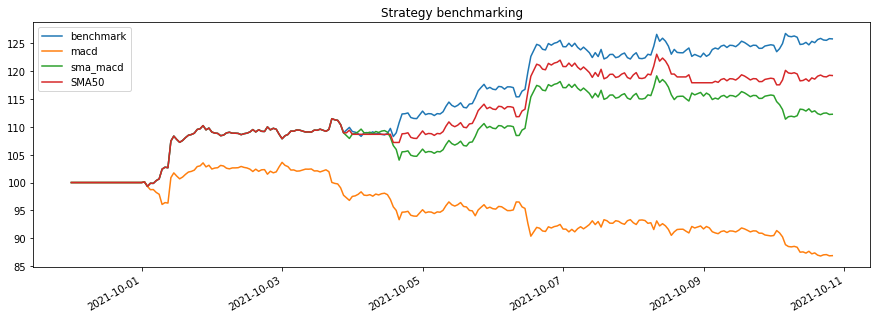

In [160]:
bt_results_test = bt.run(bt_benchmark, bt_macd, bt_sma_macd, bt_sma50)
bt_results_test.plot(title='Strategy benchmarking')
